In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import librosa

# Splitting the dataset and loading audio files

In [4]:
import os
import random

angry_trainName = []
angry_testName = random.sample(os.listdir('emotion_audio/angry'), 30)

for fileName in os.listdir('emotion_audio/angry'):
    if fileName not in angry_testName:
        angry_trainName.append(fileName)

fear_trainName = []
fear_testName = random.sample(os.listdir('emotion_audio/fear'), 30)

for fileName in os.listdir('emotion_audio/fear'):
    if fileName not in fear_testName:
        fear_trainName.append(fileName)
        
happy_trainName = []
happy_testName = random.sample(os.listdir('emotion_audio/happy'), 30)

for fileName in os.listdir('emotion_audio/happy'):
    if fileName not in happy_testName:
        happy_trainName.append(fileName)

sad_trainName = []
sad_testName = random.sample(os.listdir('emotion_audio/sad'), 30)

for fileName in os.listdir('emotion_audio/sad'):
    if fileName not in sad_testName:
        sad_trainName.append(fileName)

In [5]:
train_signal = []
train_sample_rate = []

for fileName in angry_trainName:
    fileName = 'emotion_audio/angry/' + fileName
    signal, sample_rate = librosa.load(fileName)
    train_signal.append(signal)
    train_sample_rate.append(sample_rate)

test_signal = []
test_sample_rate = []

for fileName in angry_testName:
    fileName = 'emotion_audio/angry/' + fileName
    signal, sample_rate = librosa.load(fileName)
    test_signal.append(signal)
    test_sample_rate.append(sample_rate)

for fileName in fear_trainName:
    fileName = 'emotion_audio/fear/' + fileName
    signal, sample_rate = librosa.load(fileName)
    train_signal.append(signal)
    train_sample_rate.append(sample_rate)

for fileName in fear_testName:
    fileName = 'emotion_audio/fear/' + fileName
    signal, sample_rate = librosa.load(fileName)
    test_signal.append(signal)
    test_sample_rate.append(sample_rate)

for fileName in happy_trainName:
    fileName = 'emotion_audio/happy/' + fileName
    signal, sample_rate = librosa.load(fileName)
    train_signal.append(signal)
    train_sample_rate.append(sample_rate)

for fileName in happy_testName:
    fileName = 'emotion_audio/happy/' + fileName
    signal, sample_rate = librosa.load(fileName)
    test_signal.append(signal)
    test_sample_rate.append(sample_rate)

for fileName in sad_trainName:
    fileName = 'emotion_audio/sad/' + fileName
    signal, sample_rate = librosa.load(fileName)
    train_signal.append(signal)
    train_sample_rate.append(sample_rate)

for fileName in sad_testName:
    fileName = 'emotion_audio/sad/' + fileName
    signal, sample_rate = librosa.load(fileName)
    test_signal.append(signal)
    test_sample_rate.append(sample_rate)

# Feature Extraction

In [6]:
x_train_chroma = []
x_test_chroma = []

for i in range(len(train_signal)):
    chromagram = librosa.feature.chroma_stft(y=train_signal[i], sr=train_sample_rate[i])
    chromagram = chromagram.flatten()
    chromagram = chromagram[:700]
    x_train_chroma.append(chromagram)
for i in range(len(test_signal)):
    chromagram = librosa.feature.chroma_stft(y=test_signal[i], sr=test_sample_rate[i])
    chromagram = chromagram.flatten()
    chromagram = chromagram[:700]
    x_test_chroma.append(chromagram)
    
y_train = ['angry']*70
y_train.extend(['fear']*70)
y_train.extend(['happy']*70)
y_train.extend(['sad']*70)

y_test = ['angry']*30
y_test.extend(['fear']*30)
y_test.extend(['happy']*30)
y_test.extend(['sad']*30)

In [7]:
x_train_zrc = []
x_test_zrc = []

for i in range(len(train_signal)):
    zrc = librosa.feature.zero_crossing_rate(y = train_signal[i])
    zrc = zrc.flatten()
    zrc = zrc[:60]
    x_train_zrc.append(zrc)
for i in range(len(test_signal)):
    zrc = librosa.feature.zero_crossing_rate(y = test_signal[i])
    zrc = zrc.flatten()
    zrc = zrc[:60]
    x_test_zrc.append(zrc)

In [8]:
x_train_melspectrogram = []
x_test_melspectrogram = []

for i in range(len(train_signal)):
    melspectrogram = librosa.feature.melspectrogram(y=train_signal[i], sr=train_sample_rate[i])
    melspectrogram = melspectrogram.flatten()
    melspectrogram = melspectrogram[:7900]
    x_train_melspectrogram.append(melspectrogram)
for i in range(len(test_signal)):
    melspectrogram = librosa.feature.melspectrogram(y=test_signal[i], sr=test_sample_rate[i])
    melspectrogram = melspectrogram.flatten()
    melspectrogram = melspectrogram[:7900]
    x_test_melspectrogram.append(melspectrogram)

# Building and Evaluating Model for Chromagram Feature

In [9]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc, classification_report

In [10]:
svm = SVC(probability=True)
nbc = GaussianNB()
rfc = RandomForestClassifier()
svm.fit(x_train_chroma, y_train)
nbc.fit(x_train_chroma, y_train)
rfc.fit(x_train_chroma, y_train)

RandomForestClassifier()

In [11]:
y_svm_predicted = svm.predict(x_test_chroma)
y_svm_pred_proba = svm.predict_proba(x_test_chroma)

y_nbc_predicted = nbc.predict(x_test_chroma)
y_nbc_pred_proba = nbc.predict_proba(x_test_chroma)

y_rfc_predicted = rfc.predict(x_test_chroma)
y_rfc_pred_proba = rfc.predict_proba(x_test_chroma)

In [12]:
print(classification_report(y_test, y_svm_predicted))
print(classification_report(y_test, y_nbc_predicted))
print(classification_report(y_test, y_rfc_predicted))

              precision    recall  f1-score   support

       angry       0.93      0.87      0.90        30
        fear       0.86      1.00      0.92        30
       happy       1.00      0.93      0.97        30
         sad       0.97      0.93      0.95        30

    accuracy                           0.93       120
   macro avg       0.94      0.93      0.93       120
weighted avg       0.94      0.93      0.93       120

              precision    recall  f1-score   support

       angry       0.74      0.83      0.78        30
        fear       0.81      0.97      0.88        30
       happy       1.00      0.93      0.97        30
         sad       1.00      0.73      0.85        30

    accuracy                           0.87       120
   macro avg       0.89      0.87      0.87       120
weighted avg       0.89      0.87      0.87       120

              precision    recall  f1-score   support

       angry       0.93      0.87      0.90        30
        fear       0.

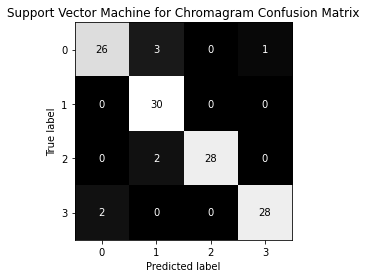

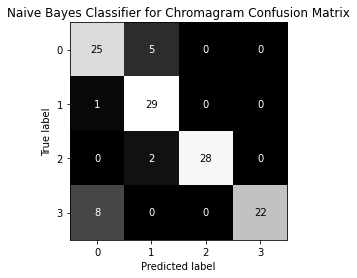

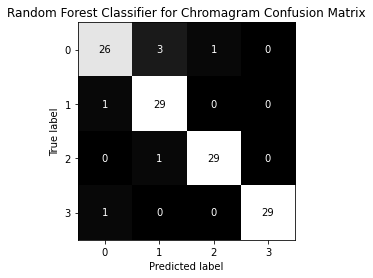

In [13]:
models = ['Support Vector Machine for Chromagram', 'Naive Bayes Classifier for Chromagram', 'Random Forest Classifier for Chromagram']
predictions = [y_svm_predicted, y_nbc_predicted, y_rfc_predicted]
pred_probabilities = [y_svm_pred_proba, y_nbc_pred_proba, y_rfc_pred_proba]

plot = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test, prediction))
    disp.plot(
        include_values=True,
        cmap='gray',
        colorbar=False
    )
    disp.ax_.set_title(f"{model} Confusion Matrix")

# Building and Evaluating Model for Zero Crossing Rate

In [14]:
svm = SVC(probability=True)
nbc = GaussianNB()
rfc = RandomForestClassifier()
svm.fit(x_train_zrc, y_train)
nbc.fit(x_train_zrc, y_train)
rfc.fit(x_train_zrc, y_train)

RandomForestClassifier()

In [15]:
y_svm_predicted = svm.predict(x_test_zrc)
y_svm_pred_proba = svm.predict_proba(x_test_zrc)

y_nbc_predicted = nbc.predict(x_test_zrc)
y_nbc_pred_proba = nbc.predict_proba(x_test_zrc)

y_rfc_predicted = rfc.predict(x_test_zrc)
y_rfc_pred_proba = rfc.predict_proba(x_test_zrc)

In [16]:
print(classification_report(y_test, y_svm_predicted))
print(classification_report(y_test, y_nbc_predicted))
print(classification_report(y_test, y_rfc_predicted))

              precision    recall  f1-score   support

       angry       0.93      0.90      0.92        30
        fear       0.89      0.80      0.84        30
       happy       0.79      0.90      0.84        30
         sad       1.00      1.00      1.00        30

    accuracy                           0.90       120
   macro avg       0.90      0.90      0.90       120
weighted avg       0.90      0.90      0.90       120

              precision    recall  f1-score   support

       angry       0.90      0.93      0.92        30
        fear       0.96      0.87      0.91        30
       happy       0.88      0.97      0.92        30
         sad       1.00      0.97      0.98        30

    accuracy                           0.93       120
   macro avg       0.94      0.93      0.93       120
weighted avg       0.94      0.93      0.93       120

              precision    recall  f1-score   support

       angry       1.00      0.97      0.98        30
        fear       1.

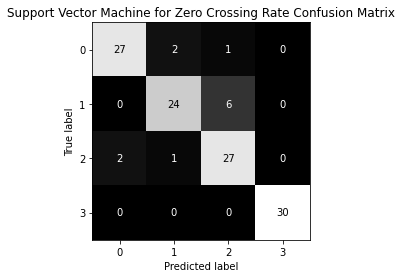

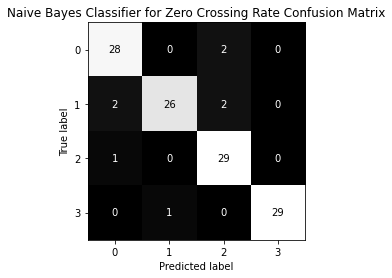

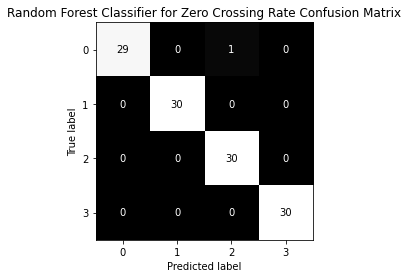

In [17]:
models = ['Support Vector Machine for Zero Crossing Rate', 'Naive Bayes Classifier for Zero Crossing Rate', 'Random Forest Classifier for Zero Crossing Rate']
predictions = [y_svm_predicted, y_nbc_predicted, y_rfc_predicted]
pred_probabilities = [y_svm_pred_proba, y_nbc_pred_proba, y_rfc_pred_proba]

plot = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test, prediction))
    disp.plot(
        include_values=True,
        cmap='gray',
        colorbar=False
    )
    disp.ax_.set_title(f"{model} Confusion Matrix")

# Building and Evaluating Model for Mel Spectrogram Feature

In [18]:
svm = SVC(probability=True)
nbc = GaussianNB()
rfc = RandomForestClassifier()
svm.fit(x_train_melspectrogram, y_train)
nbc.fit(x_train_melspectrogram, y_train)
rfc.fit(x_train_melspectrogram, y_train)

RandomForestClassifier()

In [19]:
y_svm_predicted = svm.predict(x_test_melspectrogram)
y_svm_pred_proba = svm.predict_proba(x_test_melspectrogram)

y_nbc_predicted = nbc.predict(x_test_melspectrogram)
y_nbc_pred_proba = nbc.predict_proba(x_test_melspectrogram)

y_rfc_predicted = rfc.predict(x_test_melspectrogram)
y_rfc_pred_proba = rfc.predict_proba(x_test_melspectrogram)

In [20]:
print(classification_report(y_test, y_svm_predicted))
print(classification_report(y_test, y_nbc_predicted))
print(classification_report(y_test, y_rfc_predicted))

              precision    recall  f1-score   support

       angry       0.83      0.83      0.83        30
        fear       0.71      0.67      0.69        30
       happy       0.97      0.97      0.97        30
         sad       0.81      0.87      0.84        30

    accuracy                           0.83       120
   macro avg       0.83      0.83      0.83       120
weighted avg       0.83      0.83      0.83       120

              precision    recall  f1-score   support

       angry       1.00      0.73      0.85        30
        fear       0.67      0.80      0.73        30
       happy       0.70      0.93      0.80        30
         sad       1.00      0.73      0.85        30

    accuracy                           0.80       120
   macro avg       0.84      0.80      0.80       120
weighted avg       0.84      0.80      0.80       120

              precision    recall  f1-score   support

       angry       1.00      0.97      0.98        30
        fear       0.

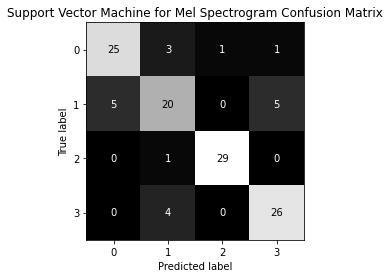

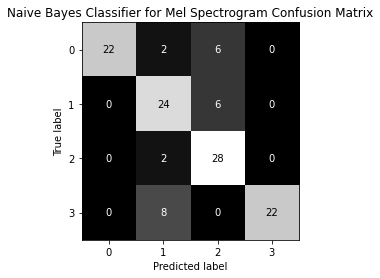

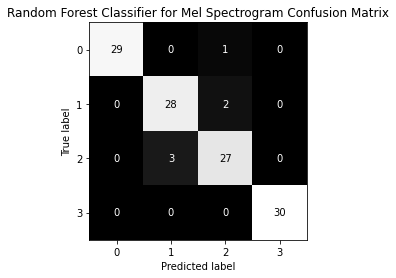

In [21]:
models = ['Support Vector Machine for Mel Spectrogram', 'Naive Bayes Classifier for Mel Spectrogram', 'Random Forest Classifier for Mel Spectrogram']
predictions = [y_svm_predicted, y_nbc_predicted, y_rfc_predicted]
pred_probabilities = [y_svm_pred_proba, y_nbc_pred_proba, y_rfc_pred_proba]

plot = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test, prediction))
    disp.plot(
        include_values=True,
        cmap='gray',
        colorbar=False
    )
    disp.ax_.set_title(f"{model} Confusion Matrix")